In [2]:
from matplotlib import pyplot as plt
import numpy as np
from math import *

In [3]:
L = 3
A = 1
sigma = 2

In [4]:
F = 5

# sampling step
dt = 0.5 # 0.5 * pi

n = int(2 * F / dt) # int(2 * F / dt * pi)

t_max = n * dt / 2

t = [i * dt * 0.01 for i in range(-int(t_max / dt / 0.01), int(t_max / dt / 0.01), 100)] # i * dt * 0.01 / pi

x = [i * 0.005 for i in range(-int(t_max / 0.005), int(t_max / 0.005), 1)] # i * 0.005 / pi

In [5]:
def gauss(x, sigma, A):
    return A * exp(-(x ** 2) / (sigma ** 2))

In [6]:
def rect(x):
    return 1 if abs(x) <= 1 else 0

In [7]:
def restore(samples, x, n, t, F, dt):
    restored = [0 for i in range(0, len(x))]
    
    for i in range(0, len(x)):
        for j in range(0, n):
            restored[i] += samples[j] * np.sinc((x[i] - t[j]) / dt) # np.sinc(pi * (x[i] - t[j]) / dt)
            
    return restored

In [8]:
# print(t_max, len(t))
# print(restore([gauss(i, sigma, A) for i in t], x, n, t, dt))
# print(restore([gauss(i, sigma, A) for i in t], x, n, t, F, dt))

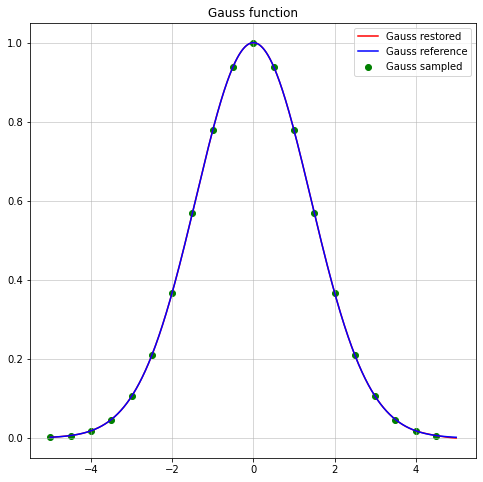

In [9]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.grid(linewidth=0.5)
plt.title('Gauss function')
plt.plot(x, restore([gauss(i, sigma, A) for i in t], x, n, t, F, dt), color='r', label='Gauss restored')
plt.plot(x, [gauss(i, sigma, A) for i in x], color='b', label='Gauss reference')
plt.scatter(t, [gauss(i, sigma, A) for i in t], color='g', label='Gauss sampled')
plt.legend()

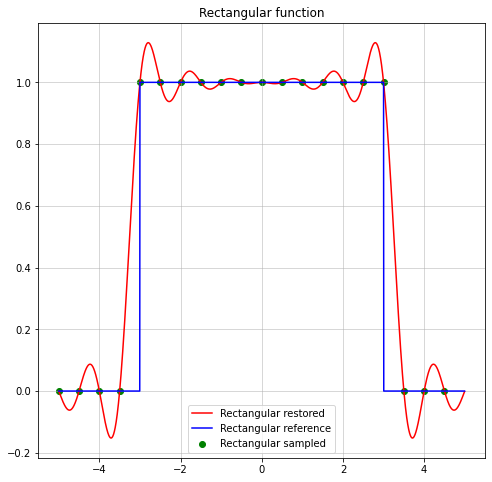

In [10]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.grid(linewidth=0.5)
plt.title('Rectangular function')
plt.plot(x, restore([rect(i / L) for i in t], x, n, t, F, dt), color='r', label='Rectangular restored')
plt.plot(x, [rect(i / L) for i in x], color='b', label='Rectangular reference')
plt.scatter(t, [rect(i / L) for i in t], color='g', label='Rectangular sampled')
plt.legend()